### Problem 1: Gradient Descent Update Rule

**1.1**: In learning neural networks, we typically minimize a loss function $\mathcal{L}(w)$ with respect to the network parameters $w$. It is also important that we *regularize* the network to reduce overfitting. A simple and popular regularization strategy is to penalize some *norm* of $w$.

Consider that we have $N$ examples $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$ such that $x_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}, i = 1...N$. Also consider that we have at our disposal a single neuron. Let $w = [w_1, w_2, ..., w_d]^T$ be the weight vector and the output be given by $\hat y_i = tanh(w.x_i)$. The loss function is given by: $\sum_{i=1}^N l(y_i, \hat y_i) + \lambda \|w\|^2$ where $\lambda$ is the weight of regularization. Derive the update rule for minimizing this loss using stochastic gradient descent with step size $\eta$ when $l(y_i, \hat y_i) = log_e(1 + exp(-y_i. \hat y_i))$. In other words, at time $t+1$, express the new parameters $w_{t+1}$ in terms of the old parameters $w_t$.

 

**1.1**:  

The gradient of the given loss with respect to $w$ is:
$$
\begin{aligned}
\nabla_w \big(l(y_i, \hat y_i) + \lambda \|w\|^2 \big) &= \nabla_w \big(log(1 + exp(-y_i \hat y_i))\big) + 2\lambda w \\
&= \nabla_{\hat y_i} \big(log(1 + exp(-y_i \hat y_i))\big) \nabla_{w} (\hat y_i) + 2\lambda w \\
&= \frac{-y_i exp(-y_i \hat y_i)}{1 + exp(-y_i \hat y_i)} \nabla_{w} (tanh(w.x_i)) + 2\lambda w \\
&= -y_i \sigma(-y_i \hat y_i) (1-tanh^2(w.x_i)) x_i + 2\lambda w \\
\end{aligned}
$$

The corresponding update rule is:  
$$
\begin{aligned}
w_{t+1} &= w_t - \eta \nabla_w \big(l(y_i, \hat y_i) + \lambda \|w\|^2 \big) \\
&= w_t + \eta y_i \sigma(-y_i \hat y_i) (1-tanh^2(w.x_i)) x_i - 2 \eta \lambda w \\
\end{aligned}
$$

### Problem 2: Numerical Overflow and Underflow

The output obtained by running the below cell is due to the condition which is called [numerical underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow). It is the condition that occurs when the true result of a floating point operation is smaller in magnitude than the smallest value representable as a normal floating point number in the target datatype.

In [1]:
1e10+1e-10 == 1e10

True

The warning message given by running the below cell must have the word 'overflow' in it. This condition that occurs when a calculation produces a result that is greater in magnitude than the largest value representable in the target datatype is called [numerical overflow](https://en.wikipedia.org/wiki/Integer_overflow).

In [2]:
import numpy as np
np.exp(1000) == np.inf

<ipython-input-2-9a3a1acb84ee>:2: RuntimeWarning: overflow encountered in exp
  np.exp(1000) == np.inf


True

**2.1**: How do people deal with numerical overflow and underflow? Why have we implemented $\text{softplus}(x) = \log(1+\exp(x))$ as shown in the cell below?

In [3]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

**2.1**   

One can deal with numerical underflow and overflow to some extent by using the datatype that can accomodate a wider range of numbers with high precision. However, one another way of dealing with numerical underflow and overflow is by changing the equation itself, which may lead to a loss in precision. The equation can be changed in such a way that the outcome is still valid and the loss in precision is within an acceptable level. 

$\text{softplus}(x) = \log(1+\exp(x))$ is implemented as shown below in order to handle numerical underflow and overflow. $e^{x}$ is a very large number, when x is a large positive number and it is very small when x is a very small negative number. So, to calculate $\log(1+e^x)$ in such cases, what can instead be done to handle underlow  and overflow is that the expression can be modified. When x is a very large positive number, $e^x+1 \approx e^x$ and therefore, $\log(1+e^x) \approx x$. Similarly, when x is a very small negative number, $e^x+1 \approx 1$ and therefore, $\log(1+e^x) \approx 0$. Of course, the resulting number has a loss of precision. Therefore, the code below uses these approximations only when x $\geq$ 5 and x $\leq$ -5 respectively. Taking this limit of 5 ensures that the drift from the actual value of the approximated value is within 1e-3.

### Problem 3: Perceptron Learning Algorithm

**3.1**: The code below generates $n$ 2D data points according to the Gaussian distribution $X1 \sim \mathcal{N}([1,0],\,I_{2\times2})$ and assigns them label 1. It also generates another $n$ 2D data points according to the Gaussian distribution $X2 \sim \mathcal{N}([-1,0],\,I_{2\times2})$ and assigns them label -1.

If perceptron learning algorithm is used to classify the data, will it converge?

In [4]:
import numpy as np
np.random.seed(1)

def generate_data(n):
    '''Generate synthetic data'''
    
    X1 = np.random.multivariate_normal([1,0], [[1,0],[0,1]], n)
    X2 = np.random.multivariate_normal([-1,0], [[1,0],[0,1]], n)
    X = np.vstack((X1, X2))

    y1 = np.ones(n, dtype=int)
    y2 = -np.ones(n, dtype=int)
    y = np.concatenate((y1, y2))
    
    return X, y
X_train, y_train = generate_data(100)

**3.1**

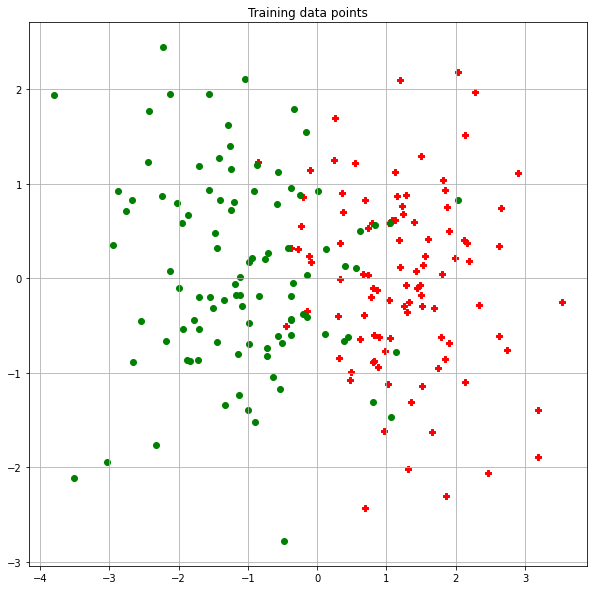

In [5]:
import matplotlib.pyplot as plt

indexes_with_class1 = y_train==1
plt.figure(figsize=(10,10))
plt.title('Training data points')
plt.scatter(X_train[indexes_with_class1][:,0],X_train[indexes_with_class1][:,1], color='r', marker='P')
plt.scatter(X_train[~indexes_with_class1][:,0],X_train[~indexes_with_class1][:,1], color='g', marker='o')
plt.grid()
plt.show()

The data isn't linearly separable. So, perceptron learning algorithm will not converge.

### Problem 4: Implementing Multilayer Perceptron and Backpropagation

We will be using [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits for this classification task.

In [6]:
import numpy as np
np.random.seed(0)

## Load the training data from the data folder
output_dim = 10
x_train = np.load('./data/X_train.npy')
x_train = x_train.flatten().reshape(-1,28*28)
x_train = x_train / 255.0
x_train = x_train.T
gt_indices = np.load('./data/y_train.npy')
train_length = x_train.shape[1]

#creating one hot vector representation
y_train = np.zeros((train_length, output_dim))
for i in range(train_length):
    y_train[i,gt_indices[i]] = 1
y_train = y_train.T
print("Number of training examples: {:d}".format(train_length))

## Loading the test data
x_test = np.load('./data/X_test.npy')
x_test = x_test.flatten().reshape(-1,28*28)
x_test = x_test / 255.0
x_test = x_test.T
gt_indices = np.load('./data/y_test.npy')
test_length = x_test.shape[1]

#creating one hot vector representation
y_test = np.zeros((test_length, output_dim))
for i in range(test_length):
    y_test[i,gt_indices[i]] = 1
y_test = y_test.T
print("Number of test examples: {:d}".format(test_length))

Number of training examples: 60000
Number of test examples: 10000


This problem considers neural networks with multiple layers. Each layer has multiple inputs and outputs, and can be broken down into two parts:  

A linear module that implements a linear transformation:     $ z_j = (\sum^{m}_{i=1} x_i W_{i,j}) + {W_0}_j$  
specified by a weight matrix $W$ and a bias vector $W_0$. The output is $[z_1, \ldots, z_n]^T$

An activation module that applies an activation function to the outputs of the linear module for some activation function $f$, such as Tanh or ReLU in the hidden layers or Softmax at the output layer. We write the output as: $[f(z_1), \ldots, f(z_m)]^T$, although technically, for some activation functions such as softmax, each output will depend on all the $z_i$.

We will use the following notation for quantities in a network:
- Inputs to the network are $x_1,..., x_d$
- Number of layers is $L$
- There are $m^l$ inputs to layer $l$
- There are $n^l = m^{l+1}$ outputs from layer $l$
- The weight matrix for layer $l$ is $W^l$, an $m^l \times n^l$ matrix, and the bias vector (offset) is $W_0^l$, an $n^l \times 1$ vector
- The outputs of the linear module for layer $l$ are known as pre-activation values and denoted $z^l$
- The activation function at layer $l$ is $f^l(\cdot)$
- Layer $l$ activations are $a^l = [f^l(z^l_1), \ldots, f^l(z^l_{n^l})]^T$
- The output of the network is the values $a^L = [f^L(z^L_1), \ldots, f^L(z^L_{n^L})]^T$
- Loss function $Loss(a,y)$ measures the loss of output values $a$ when the target is $y$


We'll use the modular implementation, which leads to clean code. The basic framework for SGD training is given below. We can construct a network and train it as follows:

```
# build a 3-layer network
net = Sequential([Linear(2,3), Tanh(),
                  Linear(3,3), Tanh(),
    	          Linear(3,2), SoftMax()])
# train the network on data and labels
net.sgd(x_train, y_train)
```

## Linear Modules: ##
Each linear module has a forward method that takes in a batch of activations A (from the previous layer) and returns a batch of pre-activations Z; ; it can also store its input or output vectors for use by other methods (e.g., for subsequent backpropagation).

$Z = W^T A + W_0$

Each linear module has a backward method that takes in a column vector dLdZ and returns dLdA. This module also computes and stores dLdW and dLdW0, the gradients with respect to the weights.

$\frac{\partial Loss}{\partial A} = \frac{\partial Z}{\partial A} \frac{\partial Loss}{\partial Z}$ and similarly.

In [7]:
class Module:
    def sgd_step(self, lrate): 
        pass # For modules without weights

class Linear(Module):
    def __init__(self, m, n):
        self.m, self.n = (m, n)  # (in size, out size)
        self.W0 = np.zeros([self.n, 1])  # (n x 1)
        self.W = np.random.normal(0, 1.0 * m ** (-.5), [m, n])  # (m x n)

    def forward(self, A):
        self.A = A   # (m x b)  b is the batch size, which is 1 for SGD
        return np.dot(self.W.T, A) + self.W0

    def backward(self, dLdZ):  # dLdZ is (n x b), uses stored self.A
        self.dLdW = np.dot(self.A, dLdZ.T) # (m x n)
        self.dLdW0 = dLdZ.sum(axis=1).reshape((self.n, 1)) # (n x 1)
        return np.dot(self.W, dLdZ) # (m x b)

    def sgd_step(self, lrate):  # Gradient descent step
        self.W -= lrate*self.dLdW
        self.W0 -= lrate*self.dLdW0

## Activation functions: ##
Activation modules don't have any weights and so they are simpler.

Each activation module has a forward method that takes in a batch of pre-activations Z and returns a batch of activations A.

Each activation module has a backward method that takes in dLdA and returns dLdZ, with the exception of SoftMax, where we assume dLdZ is passed in.

$\frac{\partial Loss}{\partial Z} = \frac{\partial Loss}{\partial A} \frac{\partial A}{\partial Z}$

For Softmax = $SM(Z)$ at the output layer and cross entropy as the $Loss(A,Y)$ function, there is a [simple form](https://peterroelants.github.io/posts/cross-entropy-softmax/) for ${\tt dLdZ} = \frac{\partial Loss}{\partial Z}$; namely, it is the prediction error $A−Y$. 

### Tanh: ###

In [8]:
class Tanh(Module):            # Layer activation
    def forward(self, Z):
        self.A = np.tanh(Z)
        return self.A

    def backward(self, dLdA):    # Uses stored self.A
        return dLdA * (1.0 - (self.A ** 2))

### ReLU: ###

In [9]:
class ReLU(Module):              # Layer activation
    def forward(self, Z):
        self.A = np.maximum(0, Z)
        return self.A

    def backward(self, dLdA):    # uses stored self.A
        return dLdA * (self.A != 0)

### SoftMax: ###
For `SoftMax.class_fun()`, given the column vector of class probabilities for each point (computed by Softmax), return a vector of the classes (integers) with the highest probability for each point.

In [10]:
class SoftMax(Module):           # Output activation
    def forward(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=0)

    def backward(self, dLdZ):    # Assume that dLdZ is passed in
        return dLdZ

    def class_fun(self, Ypred):  # Return class indices
        return np.argmax(Ypred, axis=0)

## Loss Function: ##
Each loss module has a forward method that takes in a batch of predictions Ypred (from the previous layer) and labels Y and returns a scalar loss value.

The CrossE module has a backward method that returns dLdZ, the gradient with respect to the preactivation to SoftMax (note: not the activation!), since we are always pairing SoftMax activation with Cross Entropy loss.

### Cross Entropy: ###

In [11]:
class CROSSE(Module):       # Loss
    def forward(self, Ypred, Y):
        self.Ypred = Ypred
        self.Y = Y
        return float(np.sum(-Y * np.log(Ypred)))

    def backward(self):  # Use stored self.Ypred, self.Y
        return self.Ypred - self.Y

## Neural Network: ##

Implement SGD. 
- We randomly pick a data point Xt, Yt by using np.random.randint to choose a random index into the data. 
- Then we compute the predicted output Ypred for Xt with the forward method and the loss for Ypred relative to Yt. 
- We use the backward method to compute the gradients and the sgd_step method to change the weights.

Also, we record the training accuracy after every 1000 iterations and plot it to show how the training accuracy changes with the number of iterations.

In [12]:
import matplotlib.pyplot as plt

class Sequential:
    def __init__(self, modules, loss):            # List of modules, loss module
        self.modules = modules
        self.loss = loss

    def sgd(self, X, Y, iters=100, lrate=0.005):  # Train
        D, N = X.shape
        accuracies = []
        itrns = []
        for it in range(iters):
            i = np.random.randint(N)
            Xt = X[:, i:i+1]
            Yt = Y[:, i:i+1]
            Ypred = self.forward(Xt)
            loss = self.loss.forward(Ypred, Yt)
            err = self.loss.backward()
            self.backward(err)
            self.sgd_step(lrate)
            if it % 1000 == 0 or it == iters-1:
                acc = self.get_accuracy(X, Y)
                accuracies.append(acc * 100)
                itrns.append(it)
                print('Iteration =', it, '\tTraining Accuracy = %.2f%%' % (acc * 100))
        plt.xlabel('Iteration')
        plt.ylabel('Training Accuracy')
        plt.plot(itrns, accuracies)

    def forward(self, Xt):                        # Compute Ypred
        for m in self.modules: 
            Xt = m.forward(Xt)
        return Xt

    def backward(self, delta):                    # Update dLdW and dLdW0
        # Note reversed list of modules
        for m in self.modules[::-1]: 
            delta = m.backward(delta)

    def sgd_step(self, lrate):                    # Gradient descent step
        for m in self.modules: 
            m.sgd_step(lrate)

    def get_accuracy(self, X, Y):
        # Method to print accuracy
        cf = self.modules[-1].class_fun
        acc = np.mean(cf(self.forward(X)) == cf(Y))
        return acc

Now, keeping the **number of hidden layers fixed at 2** and **learning rate fixed at 0.005** and the **number of iterations fixed at 17000**, we try tuning the number of hidden units in each hidden layer as well as the activation function after every linear module.

Iteration = 0 	Training Accuracy = 11.46%
Iteration = 1000 	Training Accuracy = 78.23%
Iteration = 2000 	Training Accuracy = 85.13%
Iteration = 3000 	Training Accuracy = 87.58%
Iteration = 4000 	Training Accuracy = 85.98%
Iteration = 5000 	Training Accuracy = 88.33%
Iteration = 6000 	Training Accuracy = 88.25%
Iteration = 7000 	Training Accuracy = 89.91%
Iteration = 8000 	Training Accuracy = 89.85%
Iteration = 9000 	Training Accuracy = 90.74%
Iteration = 10000 	Training Accuracy = 90.79%
Iteration = 11000 	Training Accuracy = 92.13%
Iteration = 12000 	Training Accuracy = 90.64%
Iteration = 13000 	Training Accuracy = 91.44%
Iteration = 14000 	Training Accuracy = 92.38%
Iteration = 15000 	Training Accuracy = 92.66%
Iteration = 16000 	Training Accuracy = 92.56%
Iteration = 16999 	Training Accuracy = 93.47%
Test Acc = 93.34%


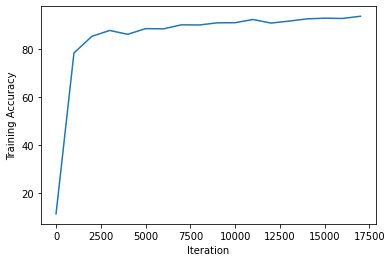

In [13]:
input_dim = 784  # input dimension
nn = Sequential([Linear(input_dim, 256), ReLU(), Linear(256, 128), ReLU(), Linear(128,output_dim), SoftMax()], CROSSE())
nn.sgd(x_train, y_train, iters=17000, lrate=0.005)
test_acc = nn.get_accuracy(x_test, y_test)
print('Test Acc = %.2f%%' % (test_acc * 100))